Here, we are taking the data set, preforming PCA analysis, then using the reduced dimensionality dataset to do a k- nearest- neighbors method.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
def clean_data(df):
    remove_numeric_columns = ['Unnamed: 0', 'shotID', 'game_id', 'id', 'goalieIdForShot',
                              'shooterPlayerId', 'goal', 'HOMEZONE', 'AWAYZONE']
    cleaned_df = df.select_dtypes(include=np.number)
    return cleaned_df.drop(columns=remove_numeric_columns)


In [52]:
dat = pd.read_csv('training_data.csv')
data = clean_data(dat)

In [23]:
data.head()

,season,isPlayoffGame,homeTeamWon,time,timeUntilNextEvent,timeSinceLastEvent,period,shotPlayContinuedOutsideZone,shotPlayContinuedInZone,shotGoalieFroze,...,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,arenaAdjustedXCordABS,location_AWAYZONE,location_HOMEZONE,location_Neu. Zone,location_Unknown
0,2016,0,0,2144,1.0,1,2,0.0,0,1,...,0.134535,0.036556,0.954787,1.0,1.0,82.0,1.0,0.0,0.0,0.0
1,2009,0,1,3399,80.0,48,3,1.0,0,0,...,0.298346,0.022210,0.729748,1.0,1.0,72.0,1.0,0.0,0.0,0.0
2,2015,0,0,2306,32.0,30,2,1.0,0,0,...,0.348396,0.019629,0.756092,0.0,0.0,74.0,0.0,1.0,0.0,0.0
3,2016,0,1,2835,1.0,34,3,0.0,0,1,...,0.157858,0.017266,0.879413,1.0,1.0,84.0,1.0,0.0,0.0,0.0
4,2012,0,1,2983,28.0,6,3,1.0,0,0,...,0.130589,0.023554,0.559104,0.0,0.0,63.0,0.0,1.0,0.0,0.0


In [47]:
def pca_analysis(data, max_components):
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)

  pca_df = []
  for i in range(1, max_components+1):
    pca = PCA(n_components=i)
    temp = pca.fit_transform(scaled_data)
    explained_variance = pca.explained_variance_ratio_
    total_explained_variance = explained_variance.sum()
    pca_df.append(total_explained_variance)
    print('Number of components:', i)
    print('Explained variance:', total_explained_variance)
  pca_df = pd.DataFrame({'Explained Variance': pca_df})
  return pca_df

Number of components: 1
Explained variance: 0.15596539405596058
Number of components: 2
Explained variance: 0.21614256794479028
Number of components: 3
Explained variance: 0.2694046119238238
Number of components: 4
Explained variance: 0.30371556366124836
Number of components: 5
Explained variance: 0.33462529421735665
Number of components: 6
Explained variance: 0.36452699548094325
Number of components: 7
Explained variance: 0.3919068592347741
Number of components: 8
Explained variance: 0.418126903666176
Number of components: 9
Explained variance: 0.44248540624987853
Number of components: 10
Explained variance: 0.46539370572139627
Number of components: 11
Explained variance: 0.4862830524626559
Number of components: 12
Explained variance: 0.5061853028425373
Number of components: 13
Explained variance: 0.5258273000064068
Number of components: 14
Explained variance: 0.5449674713921698
Number of components: 15
Explained variance: 0.5623049317595094
Number of components: 16
Explained variance

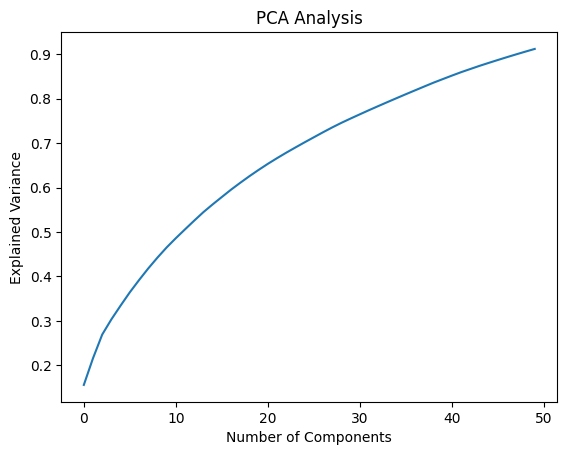

In [50]:
pca_df = pca_analysis(data,50)
print(pca_df)
plt.plot(pca_df)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Analysis')
plt.show()


In [51]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=50)  # Choose the number of components
pca.fit(scaled_data)

# Transform the data
transformed_data = pca.transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Original data:\n", data)
print("\nStandardized data:\n", scaled_data)
print("\nTransformed data:\n", transformed_data)
print("\nExplained variance ratio:\n", explained_variance)
print("\nExplained variance:\n", explained_variance.sum())

Original data:
          season  isPlayoffGame  homeTeamWon  time  timeUntilNextEvent  \
0          2016              0            0  2144                 1.0   
1          2009              0            1  3399                80.0   
2          2015              0            0  2306                32.0   
3          2016              0            1  2835                 1.0   
4          2012              0            1  2983                28.0   
...         ...            ...          ...   ...                 ...   
1472169    2019              0            0   885                 1.0   
1472170    2017              1            0  2970                 0.0   
1472171    2019              0            1  2298                 7.0   
1472172    2019              0            0  3515                 1.0   
1472173    2022              0            0  3348                 0.0   

         timeSinceLastEvent  period  shotPlayContinuedOutsideZone  \
0                         1       2   

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_train = dat['goal']
X_train = transformed_data
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set k to 5 (adjust as needed)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [56]:
# Make predictions on the test data
dat_test = pd.read_csv('validation_data.csv')
data_test = clean_data(dat_test)

# Standardize the data
scaler = StandardScaler()
scaled_data_test = scaler.fit_transform(data_test)

# Apply PCA
pca = PCA(n_components=50)  # Choose the number of components
pca.fit(scaled_data_test)

# Transform the data
transformed_data_test = pca.transform(scaled_data_test)


X_test = transformed_data_test
y_test = dat_test['goal']
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9401185727793416
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    343379
           1       0.58      0.39      0.47     24665

    accuracy                           0.94    368044
   macro avg       0.77      0.68      0.72    368044
weighted avg       0.93      0.94      0.93    368044

[[336415   6964]
 [ 15075   9590]]
